In [11]:
import polars as pl
import pyarrow as pa
import pyarrow.dataset as ds
from huggingface_hub import HfFileSystem


df=pl.read_csv("hf://datasets/lhoestq/demo1/data/train.csv")

In [2]:
df.head

<bound method DataFrame.head of shape: (5, 6)
┌────────────────────┬───────────────────┬───────────────────┬─────────────────┬──────┬────────────┐
│ id                 ┆ package_name      ┆ review            ┆ date            ┆ star ┆ version_id │
│ ---                ┆ ---               ┆ ---               ┆ ---             ┆ ---  ┆ ---        │
│ str                ┆ str               ┆ str               ┆ str             ┆ i64  ┆ i64        │
╞════════════════════╪═══════════════════╪═══════════════════╪═════════════════╪══════╪════════════╡
│ 7bd227d9-afc9-11e6 ┆ com.mantz_it.rfan ┆ Great app! The    ┆ October 12 2016 ┆ 4    ┆ 1487       │
│ -aba1-c4b301…      ┆ alyzer            ┆ new version now…  ┆                 ┆      ┆            │
│ 7bd22905-afc9-11e6 ┆ com.mantz_it.rfan ┆ Great It's not    ┆ August 23 2016  ┆ 4    ┆ 1487       │
│ -a5dc-c4b301…      ┆ alyzer            ┆ fully optimised…  ┆                 ┆      ┆            │
│ 7bd2299c-afc9-11e6 ┆ com.mantz_it.rfan ┆ Wo

In [14]:
df1 = pl.read_csv(
    "hf://datasets/commoncrawl/statistics/tlds.csv",
    try_parse_dates=True,
)

df1.head

df1 = df1.select("suffix", "date", "tld", "pages", "domains")
df1.head(13)

suffix,date,tld,pages,domains
str,date,str,i64,f64
"""a.se""",2009-01-12,"""se""",18,1.0
"""a.se""",2010-09-25,"""se""",3462,151.0
"""a.se""",2012-11-02,"""se""",6957,150.0
"""a.se""",2013-05-13,"""se""",613,46.0
"""a.se""",2013-11-25,"""se""",224,34.0
…,…,…,…,…
"""a.se""",2014-08-25,"""se""",300,34.0
"""a.se""",2014-10-06,"""se""",297,34.0
"""a.se""",2014-10-13,"""se""",593,34.0


In [15]:

# Create a Hugging Face filesystem object
hf_fs = HfFileSystem()

# Define the dataset using the Hugging Face filesystem
dataset = ds.dataset("datasets/commoncrawl/statistics/tlds.csv", filesystem=hf_fs, format="csv")


In [16]:
# Read the dataset into a PyArrow Table
table = dataset.to_table()
# Convert the PyArrow Table to a Polars DataFrame
df2 = pl.from_arrow(table)
df2.head(15)

column_0,suffix,crawl,date,type,subtype,tld,pages,urls,hosts,domains
i64,str,str,date,str,str,str,i64,i64,f64,f64
0,"""a.se""","""CC-MAIN-2008-2009""",2009-01-12,"""ccTLD""","""second-level""","""se""",18,18,1.0,1.0
1,"""a.se""","""CC-MAIN-2009-2010""",2010-09-25,"""ccTLD""","""second-level""","""se""",3462,3259,166.0,151.0
2,"""a.se""","""CC-MAIN-2012""",2012-11-02,"""ccTLD""","""second-level""","""se""",6957,6794,172.0,150.0
3,"""a.se""","""CC-MAIN-2013-20""",2013-05-13,"""ccTLD""","""second-level""","""se""",613,600,50.0,46.0
4,"""a.se""","""CC-MAIN-2013-48""",2013-11-25,"""ccTLD""","""second-level""","""se""",224,222,35.0,34.0
…,…,…,…,…,…,…,…,…,…,…
10,"""a.se""","""CC-MAIN-2014-42""",2014-10-13,"""ccTLD""","""second-level""","""se""",593,189,36.0,34.0
11,"""a.se""","""CC-MAIN-2014-49""",2014-12-01,"""ccTLD""","""second-level""","""se""",264,167,32.0,31.0
12,"""a.se""","""CC-MAIN-2014-52""",2014-12-22,"""ccTLD""","""second-level""","""se""",188,184,null,null


UCI dataset


In [5]:
import openml
dataset = openml.datasets.get_dataset(41147)  # Example ID for a large dataset
dataset

OpenML Dataset
Name.........: albert
Version......: 1
Format.......: ARFF
Upload Date..: 2018-08-15 23:55:47
Licence......: Public
Download URL.: https://api.openml.org/data/v1/download/19335520/albert.arff
OpenML URL...: https://www.openml.org/d/41147
# of features: None

In [2]:
from sklearn.datasets import fetch_covtype
import polars as pl
X, y = fetch_covtype(return_X_y=True)

In [2]:
X.shape, y.shape

((581012, 54), (581012,))

In [6]:
X.view()
# Convert to a Polars DataFrame
df = pl.DataFrame(X)
# Convert to a PyArrow Table

df.head

<bound method DataFrame.head of shape: (581_012, 54)
┌──────────┬──────────┬──────────┬──────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ column_0 ┆ column_1 ┆ column_2 ┆ column_3 ┆ … ┆ column_50 ┆ column_51 ┆ column_52 ┆ column_53 │
│ ---      ┆ ---      ┆ ---      ┆ ---      ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│ f64      ┆ f64      ┆ f64      ┆ f64      ┆   ┆ f64       ┆ f64       ┆ f64       ┆ f64       │
╞══════════╪══════════╪══════════╪══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 2596.0   ┆ 51.0     ┆ 3.0      ┆ 258.0    ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       │
│ 2590.0   ┆ 56.0     ┆ 2.0      ┆ 212.0    ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       │
│ 2804.0   ┆ 139.0    ┆ 9.0      ┆ 268.0    ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       │
│ 2785.0   ┆ 155.0    ┆ 18.0     ┆ 242.0    ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       │
│ 2595.0   ┆ 45.0     ┆ 2.0      ┆ 153.0    ┆ … ┆ 0.0       ┆ 0.0

In [ ]:
df.

<bound method DataFrame.glimpse of shape: (581_012, 54)
┌──────────┬──────────┬──────────┬──────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ column_0 ┆ column_1 ┆ column_2 ┆ column_3 ┆ … ┆ column_50 ┆ column_51 ┆ column_52 ┆ column_53 │
│ ---      ┆ ---      ┆ ---      ┆ ---      ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│ f64      ┆ f64      ┆ f64      ┆ f64      ┆   ┆ f64       ┆ f64       ┆ f64       ┆ f64       │
╞══════════╪══════════╪══════════╪══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 2596.0   ┆ 51.0     ┆ 3.0      ┆ 258.0    ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       │
│ 2590.0   ┆ 56.0     ┆ 2.0      ┆ 212.0    ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       │
│ 2804.0   ┆ 139.0    ┆ 9.0      ┆ 268.0    ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       │
│ 2785.0   ┆ 155.0    ┆ 18.0     ┆ 242.0    ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       │
│ 2595.0   ┆ 45.0     ┆ 2.0      ┆ 153.0    ┆ … ┆ 0.0       ┆ 

In [11]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
single_elder_home_monitoring_gas_and_position = fetch_ucirepo(id=799) 
  
# data (as pandas dataframes) 
X = single_elder_home_monitoring_gas_and_position.data.features 
y = single_elder_home_monitoring_gas_and_position.data.targets 
  
# metadata 
print(single_elder_home_monitoring_gas_and_position.metadata) 
  
# variable information 
print(single_elder_home_monitoring_gas_and_position.variables) 


{'uci_id': 799, 'name': 'Single Elder Home Monitoring: Gas and Position', 'repository_url': 'https://archive.ics.uci.edu/dataset/799/single+elder+home+monitoring+gas+and+position', 'data_url': 'https://archive.ics.uci.edu/static/public/799/data.csv', 'abstract': 'This dataset contains gas and temperature sensors as well as movement infra-red sensors from the monitoring of an elder person living alone in their own home from 2019-11-06 to 2020-02-13. The measurings have a temporal resolution of 20 seconds. The air and gas sensors measure temperature, humidity, CO2, CO and MOX readings. The data from the position sensors are binary; for each room, a 1 means that movement has been detected in that room while a 0 means that the sensor has gone back to baseline. The attached figure represents a simple layout of the monitored home as well as the sensors locations. The dataset also includes 19 days of measurements (from 2020-01-25 to 2020-02-13) where noone was occupying the room (except for a

In [18]:
X.items

<bound method DataFrame.items of                                timestamp  temperature  humidity  \
0       2019-11-06 11:37:13.038174+01:00        19.48     54.86   
1       2019-11-06 11:37:32.744996+01:00        19.59     54.23   
2       2019-11-06 11:37:53.018087+01:00        19.63     54.05   
3       2019-11-06 11:38:13.093151+01:00        19.64     53.74   
4       2019-11-06 11:38:33.032832+01:00        19.67     53.53   
...                                  ...          ...       ...   
416148  2020-02-13 11:56:53.929978+01:00        20.62     57.75   
416149  2020-02-13 11:57:14.204458+01:00        20.62     57.75   
416150  2020-02-13 11:57:33.983249+01:00        20.62     57.75   
416151  2020-02-13 11:57:54.058349+01:00        20.62     57.74   
416152  2020-02-13 11:58:14.014336+01:00        20.62     57.74   

        CO2CosIRValue  CO2MG811Value   MOX1   MOX2   MOX3   MOX4  COValue  
0               128.0          563.0  476.0  731.0  649.0  565.0    128.0  
1         

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, '

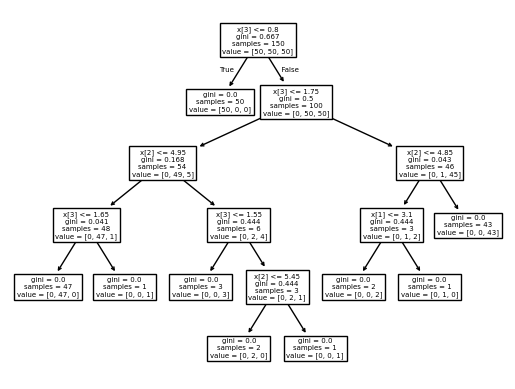

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=0)
iris = load_iris()
clf = clf.fit(iris.data, iris.target)
tree.plot_tree(clf)

In [114]:
%%bash
dnf upgrade --refresh --assumeno

Updating and loading repositories:
 pgadmin4                               100% |   3.3 KiB/s |   3.8 KiB |  00m01s
>>> Librepo error: repomd.xml GPG signature verification error: Signing key not 
 PostgreSQL common RPMs for Fedora 42 - 100% |   2.5 KiB/s |   3.7 KiB |  00m01s
>>> Librepo error: repomd.xml GPG signature verification error: Signing key not 
 LibreWolf Software Repository          100% |   1.5 KiB/s |   3.8 KiB |  00m03s
>>> Librepo error: repomd.xml GPG signature verification error: Signing key not 
 PostgreSQL 16 for Fedora 42 - x86_64   100% |   4.7 KiB/s |   4.1 KiB |  00m01s
>>> Librepo error: repomd.xml GPG signature verification error: Signing key not 
 https://rpm.librewolf.net/pubkey.gpg   100% |  11.6 KiB/s |   6.8 KiB |  00m01s
 pgadmin4                               100% |   3.6 KiB/s |   3.8 KiB |  00m01s
>>> Librepo error: repomd.xml GPG signature verification error: Signing key not 
 PostgreSQL common RPMs for Fedora 42 - 100% |   5.6 KiB/s |   3.7 KiB |  

Package           Arch   Version       Repository          Size
Skipping packages with conflicts:
 libheif          x86_64 1.19.8-1.fc42 updates          1.3 MiB
 qt6-qtbase       x86_64 6.9.0-2.fc42  updates         12.8 MiB
 qt6-qtbase-gui   x86_64 6.9.0-2.fc42  updates         23.6 MiB
Skipping packages with broken dependencies:
 telegram-desktop x86_64 5.13.1-1.fc42 rpmfusion-free 104.4 MiB

Nothing to do.


In [19]:
%%timeit
import pandas as pd
import polars as pl

244 ns ± 7.49 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [115]:
df=pd.read_csv('/home/tisinr/MEGA/Dev/models/classifier/dataset/bank-full.csv',header=0, sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [116]:
df.isnull().sum()
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [68]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# metadata 
print(bank_marketing.metadata) 
  
# variable information 
print(bank_marketing.variables) 


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [117]:
X.shape

(45211, 16)

In [118]:
#X.isna().sum()
X.isnull().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
dtype: int64